In [125]:
import torch
import numpy as np

In [126]:
# 2D Tensor
tensor_2d = torch.tensor([[1,2,3],[4,5,6]])
print(tensor_2d)

# 2D Tensor with Type
tensor_2d = torch.tensor([[1,2,3],[4,5,6]], dtype=torch.float32)
print(tensor_2d)

# 2D Tensor with cuda
tensor_2d = torch.tensor([[1,2,3],[4,5,6]], dtype=torch.float32, device="cuda")
print(tensor_2d)

# 2D Tensor with grad - when we need to compute gradients of the parameters
tensor_2d = torch.tensor([[1,2,3],[4,5,6]], dtype=torch.float32, device="cuda", requires_grad=True)
print(tensor_2d)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')
tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0', requires_grad=True)


In [127]:
# Dynamically setting gpu and cpu
device = "cuda" if torch.cuda.is_available() else "cpu"
tensor_2d = torch.tensor([[1,2,3],[4,5,6]], dtype=torch.float32, device=device)
print(tensor_2d)
print(tensor_2d.shape)

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')
torch.Size([2, 3])


### Common initialization methods

In [128]:
x = torch.empty(size=(3,3))
print(x)
x = torch.zeros((3,3)) # size is first argument bydefault
print(x)
x = torch.rand((3,3)) # Uniform Distribution
print(x)
x = torch.ones((3,3))
print(x)
x = torch.eye(3,3)
print(x)
x = torch.arange(0,10,1) # Just like range
print(x)
x = torch.linspace(0.1,1,10)
print(x)
x = torch.empty(size=(1,3)).normal_(mean=0, std=1) # Normal Distribution
print(x)
x = torch.empty(size=(1,3)).uniform_(0,1) # Uniform Distribution
print(x)
x = torch.diag(torch.ones(3))
print(x)

tensor([[-5.2900e-33,  3.0757e-41,  3.3631e-44],
        [ 0.0000e+00,         nan,  0.0000e+00],
        [ 4.4721e+21,  1.5956e+25,  4.7399e+16]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[0.1727, 0.1201, 0.2493],
        [0.4145, 0.6877, 0.3384],
        [0.8747, 0.1384, 0.7308]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9000,
        1.0000])
tensor([[ 0.0723, -1.0331, -0.7821]])
tensor([[0.4545, 0.8554, 0.8612]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


### Initializing/Converting tensors to different types

In [129]:
# These functions will always work for cpu as well as for cuda
tensor = torch.arange(4)
print(tensor.bool())
print(tensor.short()) # Int16
print(tensor.long()) # Int64
print(tensor.half()) # float16
print(tensor.half()) # float16
print(tensor.double()) # float64

tensor([False,  True,  True,  True])
tensor([0, 1, 2, 3], dtype=torch.int16)
tensor([0, 1, 2, 3])
tensor([0., 1., 2., 3.], dtype=torch.float16)
tensor([0., 1., 2., 3.], dtype=torch.float16)
tensor([0., 1., 2., 3.], dtype=torch.float64)


### Numpy to Tensor and Vice Versa

In [130]:
arr = np.zeros((5,5))
tensor = torch.from_numpy(arr)
print(tensor)
arr2 = tensor.numpy()
print(arr2)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=torch.float64)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


### Tensor Math & Comparison Operations

In [131]:
x = torch.tensor([1,2,3])
y = torch.tensor([9,8,7])

# Addition
z1 = torch.empty(3)
torch.add(x,y,out=z1)
print(z1)
print(z1.dtype)

# OR
z1 = torch.add(x,y)
print(z1)
print(z1.dtype)

# OR
z1 = x + y
print(z1)
print(z1.dtype)

tensor([10., 10., 10.])
torch.float32
tensor([10, 10, 10])
torch.int64
tensor([10, 10, 10])
torch.int64


In [132]:
# Division
z1 = x/y
print(z1)

tensor([0.1111, 0.2500, 0.4286])


In [133]:
# Inplace Operations (computationally efficient)
t = torch.ones(3)
t.add_(x)
print(t)

# OR
t = torch.ones(3)
t += x
print(t)

tensor([2., 3., 4.])
tensor([2., 3., 4.])


In [134]:
# Exponentiation
z = x.pow(2)
print(z)

# OR
z = x ** 2
print(z)

tensor([1, 4, 9])
tensor([1, 4, 9])


In [135]:
# Comparison
z = x > 0
print(z)

tensor([True, True, True])


In [136]:
# Matrix Multiplication
x1 = torch.rand((2,5))
x2 = torch.rand((5,3))
res = torch.mm(x1,x2)
print(res)

# OR
res = x1.mm(x2)
print(res)

tensor([[0.7224, 0.6172, 0.8909],
        [1.9378, 1.6177, 2.3978]])
tensor([[0.7224, 0.6172, 0.8909],
        [1.9378, 1.6177, 2.3978]])


In [137]:
# Element wise multiplication
x = torch.tensor([1,2,3])
y = torch.tensor([9,8,7])
z = x * y
print(z)

tensor([ 9, 16, 21])


In [138]:
# Dot Product (Sum(Element Wise))
z = torch.dot(x,y)
print(z)

tensor(46)


In [139]:
# Batch Matrix Multiplication
batch = 32
n = 10
m = 20
p = 30

t1 = torch.rand((batch, n, m))
t2 = torch.rand((batch, m, p))
out_bmm = torch.bmm(t1, t2) # (batch,n,p)
print(out_bmm)
print(out_bmm.shape)

tensor([[[5.0407, 4.4782, 5.3948,  ..., 4.1681, 3.7195, 5.1325],
         [5.4720, 3.8781, 4.9625,  ..., 5.0888, 4.5243, 4.9479],
         [5.0075, 3.7820, 5.4080,  ..., 4.5880, 4.2038, 5.9843],
         ...,
         [4.8689, 3.4334, 4.9943,  ..., 4.4043, 4.2350, 5.5951],
         [5.3173, 3.7799, 5.1721,  ..., 4.6662, 5.1718, 5.8796],
         [5.0784, 4.2786, 5.7995,  ..., 4.3510, 4.4769, 5.1508]],

        [[3.2058, 3.3784, 3.7221,  ..., 3.5264, 3.2175, 2.6355],
         [3.7702, 3.9454, 4.6961,  ..., 4.5110, 2.8231, 3.6373],
         [3.6381, 3.9513, 3.3183,  ..., 4.0678, 3.0960, 3.2969],
         ...,
         [4.0574, 4.2981, 4.6436,  ..., 5.0187, 3.8602, 3.6274],
         [4.3088, 4.9005, 6.0120,  ..., 5.2443, 4.5197, 5.5285],
         [3.9955, 5.2751, 5.2443,  ..., 5.0072, 4.0970, 5.1980]],

        [[4.4439, 3.8145, 5.4574,  ..., 3.3412, 3.5231, 3.0078],
         [5.6296, 5.1769, 6.4834,  ..., 4.8876, 4.7522, 4.4989],
         [4.5629, 4.3247, 5.0124,  ..., 3.5529, 3.1948, 3.

### Broadcasting

In [140]:
x1 = torch.rand((5,5))
print(x1)

x2 = torch.rand((1,5))
print(x2)

z1 = x1 - x2
print(z1) # x2 row got subtracted from each row of x1

z1 = x1 ** x2
print(z1)

tensor([[0.0392, 0.5338, 0.8452, 0.0579, 0.6508],
        [0.6406, 0.2027, 0.0253, 0.8507, 0.7146],
        [0.5870, 0.5742, 0.7932, 0.5165, 0.0377],
        [0.1090, 0.2407, 0.3424, 0.5695, 0.3347],
        [0.6006, 0.6466, 0.9674, 0.2019, 0.0904]])
tensor([[0.5939, 0.6116, 0.0468, 0.2537, 0.0402]])
tensor([[-0.5547, -0.0778,  0.7984, -0.1959,  0.6106],
        [ 0.0467, -0.4089, -0.0214,  0.5969,  0.6744],
        [-0.0069, -0.0374,  0.7464,  0.2628, -0.0025],
        [-0.4850, -0.3709,  0.2956,  0.3157,  0.2945],
        [ 0.0067,  0.0350,  0.9206, -0.0518,  0.0501]])
tensor([[0.1461, 0.6812, 0.9922, 0.4852, 0.9829],
        [0.7676, 0.3768, 0.8420, 0.9598, 0.9866],
        [0.7288, 0.7123, 0.9892, 0.8457, 0.8764],
        [0.2680, 0.4185, 0.9511, 0.8669, 0.9569],
        [0.7388, 0.7659, 0.9985, 0.6663, 0.9078]])


### Other useful tensor math operations

In [141]:
sum_x = torch.sum(x1, dim=0)
print(sum_x)

sum_y = torch.sum(x1, dim=1)
print(sum_y)

tensor([1.9765, 2.1979, 2.9736, 2.1964, 1.8282])
tensor([2.1269, 2.4339, 2.5087, 1.5963, 2.5069])


In [142]:
values, indices = torch.max(x1, dim=0)
print(values)
print(indices)

values, indices = torch.max(x1, dim=1)
print(values)
print(indices)

tensor([0.6406, 0.6466, 0.9674, 0.8507, 0.7146])
tensor([1, 4, 4, 1, 1])
tensor([0.8452, 0.8507, 0.7932, 0.5695, 0.9674])
tensor([2, 3, 2, 3, 2])


In [143]:
values, indices = torch.min(x1, dim=0)
print(values)
print(indices)

values, indices = torch.min(x1, dim=1)
print(values)
print(indices)

tensor([0.0392, 0.2027, 0.0253, 0.0579, 0.0377])
tensor([0, 1, 1, 0, 2])
tensor([0.0392, 0.0253, 0.0377, 0.1090, 0.0904])
tensor([0, 2, 4, 0, 4])


In [144]:
abs_x = torch.abs(x1)
print(abs_x)

tensor([[0.0392, 0.5338, 0.8452, 0.0579, 0.6508],
        [0.6406, 0.2027, 0.0253, 0.8507, 0.7146],
        [0.5870, 0.5742, 0.7932, 0.5165, 0.0377],
        [0.1090, 0.2407, 0.3424, 0.5695, 0.3347],
        [0.6006, 0.6466, 0.9674, 0.2019, 0.0904]])


In [145]:
z = torch.argmax(x1, dim=0)
print(z)

z = torch.argmax(x1, dim=1)
print(z)

z = torch.argmin(x1, dim=0)
print(z)

z = torch.argmin(x1, dim=1)
print(z)

tensor([1, 4, 4, 1, 1])
tensor([2, 3, 2, 3, 2])
tensor([0, 1, 1, 0, 2])
tensor([0, 2, 4, 0, 4])


In [146]:
mean_x = torch.mean(x1.float(), dim=0) # It requires the values to be float
print(mean_x)

tensor([0.3953, 0.4396, 0.5947, 0.4393, 0.3656])


In [147]:
# Element wise compare
z = torch.eq(x1,x2)
print(z)

tensor([[False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]])


In [148]:
sx0 = torch.sort(x1, dim=0, descending=False)
sx1 = torch.sort(x1, dim=1, descending=True)
print(sx0)
print(sx1)

torch.return_types.sort(
values=tensor([[0.0392, 0.2027, 0.0253, 0.0579, 0.0377],
        [0.1090, 0.2407, 0.3424, 0.2019, 0.0904],
        [0.5870, 0.5338, 0.7932, 0.5165, 0.3347],
        [0.6006, 0.5742, 0.8452, 0.5695, 0.6508],
        [0.6406, 0.6466, 0.9674, 0.8507, 0.7146]]),
indices=tensor([[0, 1, 1, 0, 2],
        [3, 3, 3, 4, 4],
        [2, 0, 2, 2, 3],
        [4, 2, 0, 3, 0],
        [1, 4, 4, 1, 1]]))
torch.return_types.sort(
values=tensor([[0.8452, 0.6508, 0.5338, 0.0579, 0.0392],
        [0.8507, 0.7146, 0.6406, 0.2027, 0.0253],
        [0.7932, 0.5870, 0.5742, 0.5165, 0.0377],
        [0.5695, 0.3424, 0.3347, 0.2407, 0.1090],
        [0.9674, 0.6466, 0.6006, 0.2019, 0.0904]]),
indices=tensor([[2, 4, 1, 3, 0],
        [3, 4, 0, 1, 2],
        [2, 0, 1, 3, 4],
        [3, 2, 4, 1, 0],
        [2, 1, 0, 3, 4]]))


In [149]:
X = torch.from_numpy(np.array([0.1,2,3,0.5,10,12,15]))

# Convert values less than 1 to 1
# Convert values more than 10 to 10
X_clamp = torch.clamp(X, min=1, max=10)
print(X_clamp)

tensor([ 1.,  2.,  3.,  1., 10., 10., 10.], dtype=torch.float64)


In [150]:
# Check any of the values is True
x = torch.tensor([1,0,1,1,1], dtype=torch.bool)
print(x)
z = torch.any(x)
print(z)

# Getting value out of tensor
print(z.item())

tensor([ True, False,  True,  True,  True])
tensor(True)
True


In [151]:
z = torch.all(x)
print(z)

tensor(False)


### Tensor Indexing

Same as Python List indexing

In [152]:
batch_size = 10
features = 25
X = torch.rand((batch_size, features))
print(X[0])

tensor([0.7738, 0.5918, 0.8584, 0.7732, 0.6388, 0.4894, 0.8645, 0.1212, 0.8528,
        0.7586, 0.6690, 0.5896, 0.1459, 0.8117, 0.4771, 0.9519, 0.1088, 0.4410,
        0.6088, 0.9554, 0.7182, 0.2316, 0.7926, 0.3720, 0.3781])


In [153]:
x = torch.arange(10)

# Filtering like Pandas
print(x[(x > 2) & (x < 8)])

print(x[x.remainder(2) == 0])

tensor([3, 4, 5, 6, 7])
tensor([0, 2, 4, 6, 8])


In [154]:
torch.where((x > 5), x, x*2) # if condition is true then same else multiplied by 2

tensor([ 0,  2,  4,  6,  8, 10,  6,  7,  8,  9])

In [155]:
# Getting unique values
torch.tensor([0,0,1,2,3,3,4,4,4,4,6]).unique()

tensor([0, 1, 2, 3, 4, 6])

In [156]:
# Number of dimensions
print(x.ndimension())

1


In [157]:
# Count no of elements in "x"
print(x.numel())
print(len(x))

10
10


### Reshaping Tensors

In [159]:
x = torch.arange(9)

# VIEW
x_3x3 = x.view(3,3) # Tensor stored contiguously in memory
print(x_3x3)

# RESHAPE
x_3x3 = x.reshape(3,3)
print(x_3x3)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [161]:
# Concatenation
x1 = torch.rand((2,5))
x2 = torch.rand((2,5))
print(torch.cat((x1,x2), dim=0).shape)
print(torch.cat((x1,x2), dim=1).shape)

torch.Size([4, 5])
torch.Size([2, 10])


In [164]:
x = torch.rand((3,3))
print(x)

# View and Reshape are functionally same but view is memory efficient - reshape creates the copy
# Flatten the vector/matrix
print(x.view(-1))

# Keep the batch but flatten the rest
batch = 64
x = torch.rand((batch, 3, 5, 3))
print(x.view(batch, -1).shape)

tensor([[0.6434, 0.7737, 0.2272],
        [0.6872, 0.2502, 0.0302],
        [0.2806, 0.5029, 0.6870]])
tensor([0.6434, 0.7737, 0.2272, 0.6872, 0.2502, 0.0302, 0.2806, 0.5029, 0.6870])
torch.Size([64, 45])


In [166]:
# Switching the dimensions
batch = 64
x = torch.rand((batch, 3, 5, 4))
z = x.permute(0, 2, 3, 1) # Setting the order
print(z.shape)

torch.Size([64, 5, 4, 3])


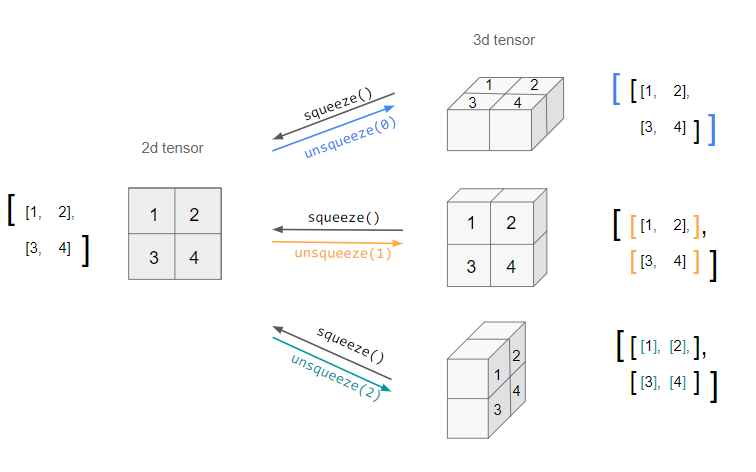

In [169]:
# Adding one more dimension
x = torch.arange(10)
print(x.shape)
y = x.unsqueeze(0)
print(y.shape)
z = x.unsqueeze(1)
print(z.shape)

torch.Size([10])
torch.Size([1, 10])
torch.Size([10, 1])


In [174]:
# Excluding extra dimension
print(y.squeeze(0)) # 1 wouldn't work here
print(z.squeeze(1)) # 0 wouldn't work here

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [182]:
# Play with it
torch.arange(10).unsqueeze(1).unsqueeze(0).shape

torch.Size([1, 10, 1])